### Titanic Dataset

Survival: 

0 = No

1 = Yes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Trainer\DSc ML\Datasets\Logistic Regression\Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the distinct values in "Survived" column(DV)

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# How many males and females were there

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
# What are the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [8]:
# Finding missing values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.Age.size

891

In [10]:
df.Age.isna().sum()

177

In [11]:
print("% of missing data in Age:", df.Age.isna().sum() / df.Age.size)

% of missing data in Age: 0.19865319865319866


**As the missing values are less than 25% then we need to fill the missing values with mean/median as numeric column.**

In [12]:
df.Cabin.isna().sum()

687

In [13]:
df.Cabin.size

891

In [14]:
print("% of missing data in Cabin:", df.Cabin.isna().sum() / df.Cabin.size)

% of missing data in Cabin: 0.7710437710437711


**As the missing values are more than 25% then we need to drop the column.**

In [15]:
print("% of missing data in Embarked:", df.Embarked.isna().sum() / df.Embarked.size)

% of missing data in Embarked: 0.002244668911335578


**As the missing values are less than 25% then we need to fill the missing values with mode as categorical column.**

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### PassengerId, Name, Ticket, Fare  columns are also to be removed as they are not significant for Survived

In [17]:
x = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis = 1)
x.head()

# x has all the independent variables

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [18]:
# Dependent Variable

y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

**Handle the mising values (Fill it)**

**Age is numeric variable - Fill it with mean/median**

**Embarked is a categorical variable - Fill it with mode**

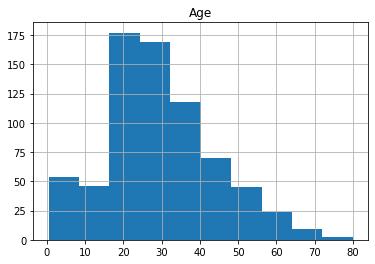

In [20]:
x.hist('Age');

**From the plot, skewness exists or it is not normally distributed. So, outlier present**

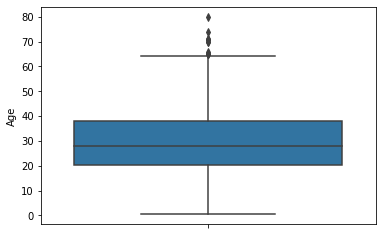

In [21]:
# Checking outliers from boxplot as well
sns.boxplot(y = 'Age', data = x);

# Outlier present in age

In [22]:
# Filling with median as outlier present

x['Age'].fillna(x.Age.median(), inplace = True)

In [23]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [24]:
x.Embarked.mode()

0    S
dtype: object

In [25]:
# Filling with mode as categorical variable

x['Embarked'].fillna(x.Embarked.mode()[0], inplace = True)

In [26]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 34.9+ KB


**Sex & Embarked are object type, need to convert to numeric type by encoding**

In [28]:
x.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
x.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Only 2 distinct values in Sex and 3 in Embarked, so we can go for the manual simple approach for encoding**

In [30]:
x.Sex[:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [31]:
x['Sex'] = pd.get_dummies(x.Sex)['female']

# male will be taken as 0 and female as 1 (not in ascending order) as we have mentioned ['female'] above

In [32]:
x.Sex[:5]

# male taken as 0 and female as 1 (not in ascending order)

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: uint8

In [33]:
x.head()

# Need to convert Embarked

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,S
1,1,1,38.0,1,0,C
2,3,1,26.0,0,0,S
3,1,1,35.0,1,0,S
4,3,0,35.0,0,0,S


In [34]:
x = x.join(pd.get_dummies(df.Embarked, prefix = 'Embarked'))
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,S,0,0,1
1,1,1,38.0,1,0,C,1,0,0
2,3,1,26.0,0,0,S,0,0,1
3,1,1,35.0,1,0,S,0,0,1
4,3,0,35.0,0,0,S,0,0,1


In [35]:
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,S,0,0,1
1,1,1,38.0,1,0,C,1,0,0
2,3,1,26.0,0,0,S,0,0,1
3,1,1,35.0,1,0,S,0,0,1
4,3,0,35.0,0,0,S,0,0,1
5,3,0,28.0,0,0,Q,0,1,0
6,1,0,54.0,0,0,S,0,0,1
7,3,0,2.0,3,1,S,0,0,1
8,3,1,27.0,0,2,S,0,0,1
9,2,1,14.0,1,0,C,1,0,0


**Delete Embarked and Embarked_C column for dummy variable**

In [36]:
x.drop(['Embarked', 'Embarked_C'], axis = 1, inplace = True)

In [37]:
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,0,1
1,1,1,38.0,1,0,0,0
2,3,1,26.0,0,0,0,1
3,1,1,35.0,1,0,0,1
4,3,0,35.0,0,0,0,1
5,3,0,28.0,0,0,1,0
6,1,0,54.0,0,0,0,1
7,3,0,2.0,3,1,0,1
8,3,1,27.0,0,2,0,1
9,2,1,14.0,1,0,0,0


In [38]:
x.info()

# uint8 as the data stored in binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    uint8  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Embarked_Q  891 non-null    uint8  
 6   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 30.5 KB


**PClass is in numeric form (1, 2, 3), while building model, all the values will be considered as True. Actually it should be stored in object format and then encoded so that actual info can be maintianed as First, Second or Third Class**

In [39]:
x = x.join(pd.get_dummies(df.Pclass, prefix = 'Pclass'))

In [40]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,3,0,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,0,0,1,0,0
2,3,1,26.0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,0,1,1,0,0
4,3,0,35.0,0,0,0,1,0,0,1


In [41]:
# drop columns to dummy variables
x.drop(['Pclass', 'Pclass_1'], axis = 1, inplace = True)

In [42]:
x.head()

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,0,0,0,0,0
2,1,26.0,0,0,0,1,0,1
3,1,35.0,1,0,0,1,0,0
4,0,35.0,0,0,0,1,0,1


**Except Age, rest all variables are in binary values. Also, there are outliers in Age as checked earlier. So, need for feature scaling using Standardisation as outliers are present**

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scalar = StandardScaler()
x.Age = scalar.fit_transform(x[['Age']])

In [45]:
display(x.head())

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,-0.565736,1,0,0,1,0,1
1,1,0.663861,1,0,0,0,0,0
2,1,-0.258337,0,0,0,1,0,1
3,1,0.433312,1,0,0,1,0,0
4,0,0.433312,0,0,0,1,0,1


In [46]:
# Splitting into Training and Test

from sklearn.model_selection import train_test_split

# from sklearn.cross_validation import train_test_split # for Python 2.X

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


### Building Logistic Regression Model

In [49]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
model.coef_

array([[ 2.48884638, -0.4369834 , -0.26566622, -0.04212095, -0.21213318,
        -0.50771885, -0.69382038, -2.01678548]])

In [52]:
model.intercept_

array([0.20781676])

In [53]:
y_pred = model.predict(x_test)

In [54]:
print(y_pred)
print(y_test)

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0]
331    0
700    1
748    0
751    1
481    0
      ..
154    0
454    0
879    1
771    0
466    0
Name: Survived, Length: 179, dtype: int64


### Check Accuracy of Log. Reg. model by Confusion Matrix

In [55]:
# Accuracy Parameter

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.90      0.84        99\n           1       0.85      0.70      0.77        80\n\n    accuracy                           0.81       179\n   macro avg       0.82      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.85      0.70      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [58]:
confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 56]], dtype=int64)

In [59]:
# Accuracy = (TN + Tp) / (TN + FP + FN + TP)
(89 + 56) / (89 + 10 + 24 + 56)

0.8100558659217877

In [60]:
accuracy_score(y_test, y_pred)

0.8100558659217877

### Accuracy is 81%

Increase accuracy using K-Fold method

## Using Decision Tree & Random Forest

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_class = DecisionTreeClassifier()
dt_class.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred_dt = dt_class.predict(x_test)

In [64]:
y_pred_dt

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test, y_pred_dt)

0.770949720670391

In [66]:
dt_class_en = DecisionTreeClassifier(criterion='entropy')
dt_class_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
y_pred_dt_en = dt_class_en.predict(x_test)

In [68]:
accuracy_score(y_test, y_pred_dt_en)

0.776536312849162

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_class = RandomForestClassifier(n_estimators=200, criterion='gini')
rf_class.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [71]:
y_pred_rf = rf_class.predict(x_test)

In [72]:
y_pred_rf

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [73]:
accuracy_score(y_test, y_pred_rf)

0.7988826815642458

In [85]:
y_train_pred_rf_gini = rf_class.predict(x_train)

In [86]:
accuracy_score(y_train, y_train_pred_rf_gini)

0.9410112359550562

**More gap between Training and Test Accuracy. Overfitting Problem. 5% - 10% difference allowed**

In [74]:
# Logistic Regression: 81%
# Decision Tree      : 78.2%
# Random Forest(Gini)      : 80.4%

In [75]:
rf_class_en = RandomForestClassifier(n_estimators=500, criterion='entropy') # Hyperparameter Tuning
rf_class_en.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [76]:
y_pred_rf_en = rf_class_en.predict(x_test)

In [77]:
accuracy_score(y_test, y_pred_rf_en)

0.7988826815642458

In [78]:
# Logistic Regression     : 81%
# Decision Tree(Gini)     : 78.2%
# Decision Tree(Entropy)  : 76.5%
# Random Forest(Gini)     : 80.4%
# Random Forest(Entropy)  : 79.8%

## Bagging Model

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
bagg_model = BaggingClassifier()
bagg_model.fit(x_train, y_train)

BaggingClassifier()

In [81]:
y_pred_bagg = bagg_model.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred_bagg)

0.8044692737430168

In [83]:
y_train_pred_bagg = bagg_model.predict(x_train)

In [84]:
accuracy_score(y_train, y_train_pred_bagg)

0.9283707865168539

**Less gap between Training and Test Accuracy. SO it is preferred. But Overfitting exists**

## Model Selection - Random Forest

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
cv = cross_val_score(rf_class, x, y, scoring = 'accuracy', cv = 10)
cv

array([0.7       , 0.78651685, 0.76404494, 0.83146067, 0.84269663,
       0.80898876, 0.84269663, 0.76404494, 0.84269663, 0.84269663])

In [91]:
cv = cross_val_score(rf_class, x, y, scoring = 'accuracy', cv = 15)
cv

# 89.8% Test Acuuracy is highest

array([0.65      , 0.81666667, 0.81666667, 0.75      , 0.8       ,
       0.83333333, 0.84745763, 0.83050847, 0.76271186, 0.84745763,
       0.81355932, 0.76271186, 0.83050847, 0.83050847, 0.89830508])

In [92]:
cv[14]

0.8983050847457628

### Random Forest
### Train Accuracy: 94.1%
### Test Accuracy: 89.8%

### No Overfitting Problem anymore

In [93]:
cv = cross_val_score(rf_class, x, y, scoring = 'accuracy', cv = 20)
cv

array([0.64444444, 0.8       , 0.68888889, 0.84444444, 0.73333333,
       0.82222222, 0.77777778, 0.84444444, 0.84444444, 0.82222222,
       0.82222222, 0.79545455, 0.77272727, 0.93181818, 0.77272727,
       0.72727273, 0.84090909, 0.84090909, 0.84090909, 0.90909091])

In [94]:
cv[13]

0.9318181818181818

#### Random Forest
#### Train Accuracy: 94.1%
#### Test Accuracy: 93.1%

#### No Overfitting Problem anymore

## Model Selection - Bagging Model

In [96]:
cv_bagg = cross_val_score(bagg_model, x, y, scoring = 'accuracy', cv = 20)
cv_bagg

array([0.64444444, 0.82222222, 0.68888889, 0.82222222, 0.75555556,
       0.82222222, 0.77777778, 0.88888889, 0.86666667, 0.8       ,
       0.84444444, 0.77272727, 0.77272727, 0.88636364, 0.75      ,
       0.79545455, 0.84090909, 0.84090909, 0.84090909, 0.84090909])

In [97]:
cv_bagg[7]

0.8888888888888888

####  Bagging
#### Training: 92.8
#### Test: 88.8%

### Similarly, can do for Logistic Regression and Decision Tree too